In [100]:
import sys
sys.path.append('..')
import os
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from utils.constants import *
from utils.file_readers import *
from utils.data_exploration import *
from utils.signal_processing import *
from utils.sliding_window import *
from utils.stand_norm import *
from utils.one_vs_all_training import *
from utils.experiment_utils import *

### Visualising some results

In [101]:
experiment_stats = pd.read_csv("../Plots/experiment_stats.csv")

In [102]:
experiment_stats

,experiment_name,activity_name,correctness,random_seed,n_train_subjects,n_validation_subjects,n_time_steps,step,n_features,features,...,mean_accuracy_valid,mean_loss_valid,std_accuracy_valid,std_loss_valid,mean_accuracy_test,mean_f1_test,mean_loss_test,std_accuracy_test,std_f1_test,std_loss_test
0,00_sit_to_stand_downsample_16_all_correctness_...,Sit to stand,all,42,12,2,38,19,3,normalised,...,0.912056,0.248081,0.024233,0.067549,0.904055,0.765533,0.258383,0.035780,0.076058,0.093180
1,0_Sit_to_stand_downsample_16_balance_25_128_fi...,Sit to stand,all,42,12,2,38,19,3,normalised,...,0.157308,0.746317,0.017922,0.013474,0.159623,0.274591,0.746376,0.024368,0.035013,0.013384
2,000_Sit_to_stand_downsample_16_balance_25_128_...,Sit to stand,all,42,12,2,38,19,3,normalised,...,0.925932,0.205479,0.020597,0.056388,0.923063,0.800918,0.213091,0.035458,0.081283,0.102341
3,001_Knee_extension_downsample_16_balance_25_12...,Knee extension,all,42,12,2,38,19,3,normalised,...,0.927107,0.192441,0.018155,0.049760,0.930224,0.690850,0.190204,0.032894,0.102842,0.106835
4,002_Squats_downsample_16_balance_25_128_filters,Squats,all,42,12,2,38,19,3,normalised,...,0.881267,0.311196,0.048398,0.133806,0.893875,0.661732,0.271579,0.039560,0.091391,0.107157
5,00all_64_filters,all,all,42,12,2,38,19,3,normalised,...,0.725089,0.860731,0.041283,0.094856,0.726605,0.947329,0.857724,0.064673,0.063130,0.156454
6,01all_batch_size_64,all,all,42,12,2,38,19,3,normalised,...,0.695704,0.947230,0.037829,0.084849,0.693636,0.938413,0.942897,0.057487,0.076626,0.136513
7,00all_window_size_50_400_epochs,all,all,42,12,2,50,25,3,normalised,...,0.792394,0.654151,0.041164,0.095628,0.803456,0.959464,0.644103,0.066215,0.069602,0.183745
8,00all_window_size_62_5_400_epochs,all,all,42,12,2,63,25,3,normalised,...,0.821440,0.569039,0.045877,0.118178,0.830910,0.965301,0.552498,0.066211,0.062277,0.193410
9,01all_window_size_50_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.810263,0.609122,0.042960,0.101629,0.815302,0.964934,0.597862,0.064730,0.062228,0.195575


In [103]:
experiment_stats.columns

Index(['experiment_name', 'activity_name', 'correctness', 'random_seed',
       'n_train_subjects', 'n_validation_subjects', 'n_time_steps', 'step',
       'n_features', 'features', 'num_filters', 'kernel_size', 'activation',
       'lr', 'batch_size', 'epochs', 'downsample_rate',
       'positive_class_weight', 'mean_accuracy_train', 'mean_loss_train',
       'std_accuracy_train', 'std_loss_train', 'mean_accuracy_valid',
       'mean_loss_valid', 'std_accuracy_valid', 'std_loss_valid',
       'mean_accuracy_test', 'mean_f1_test', 'mean_loss_test',
       'std_accuracy_test', 'std_f1_test', 'std_loss_test'],
      dtype='object')

Filter for experiments with all losoxv

In [104]:
experiment_stats_all = experiment_stats[experiment_stats['activity_name'] == 'all']

In [105]:
experiment_stats_all

,experiment_name,activity_name,correctness,random_seed,n_train_subjects,n_validation_subjects,n_time_steps,step,n_features,features,...,mean_accuracy_valid,mean_loss_valid,std_accuracy_valid,std_loss_valid,mean_accuracy_test,mean_f1_test,mean_loss_test,std_accuracy_test,std_f1_test,std_loss_test
5,00all_64_filters,all,all,42,12,2,38,19,3,normalised,...,0.725089,0.860731,0.041283,0.094856,0.726605,0.947329,0.857724,0.064673,0.063130,0.156454
6,01all_batch_size_64,all,all,42,12,2,38,19,3,normalised,...,0.695704,0.947230,0.037829,0.084849,0.693636,0.938413,0.942897,0.057487,0.076626,0.136513
7,00all_window_size_50_400_epochs,all,all,42,12,2,50,25,3,normalised,...,0.792394,0.654151,0.041164,0.095628,0.803456,0.959464,0.644103,0.066215,0.069602,0.183745
8,00all_window_size_62_5_400_epochs,all,all,42,12,2,63,25,3,normalised,...,0.821440,0.569039,0.045877,0.118178,0.830910,0.965301,0.552498,0.066211,0.062277,0.193410
9,01all_window_size_50_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.810263,0.609122,0.042960,0.101629,0.815302,0.964934,0.597862,0.064730,0.062228,0.195575
10,01all_batch_size_64_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.744057,0.812071,0.042731,0.086743,0.751369,0.948624,0.813841,0.062374,0.081699,0.167157
11,00all_window_size_63_num_filters_256_400_epochs,all,all,42,12,2,63,25,3,normalised,...,0.823691,0.588268,0.041921,0.105558,0.825649,0.953979,0.589415,0.070545,0.097607,0.223827
12,01all_batch_size_32_deep_architecture,all,all,42,12,2,50,25,3,normalised,...,0.807775,0.585695,0.033370,0.106134,0.808469,0.977302,0.574231,0.054774,0.039308,0.164895
13,00all_window_size_63_num_filters_256_400_epoch...,all,all,42,12,2,63,25,3,normalised,...,0.839510,0.506908,0.039002,0.108277,0.841339,0.958803,0.513598,0.072381,0.073296,0.227374
14,00all_window_size_63_num_filters_256_500_epoch...,all,all,42,12,2,63,25,3,normalised,...,0.838501,0.503815,0.041296,0.131352,0.842021,0.972724,0.492613,0.062078,0.054353,0.201479


<BarContainer object of 11 artists>

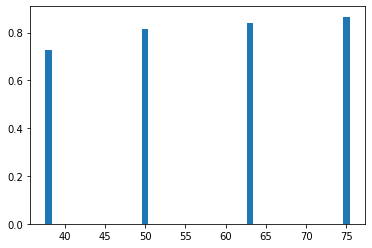

In [106]:
plt.bar(experiment_stats_all['n_time_steps'], experiment_stats_all['mean_accuracy_test'])

<BarContainer object of 11 artists>

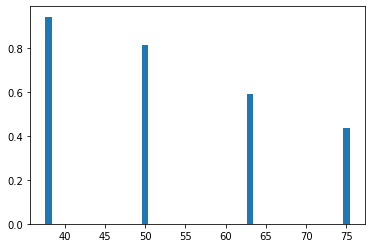

In [107]:
plt.bar(experiment_stats_all['n_time_steps'], experiment_stats_all['mean_loss_test'])

(0.7, 1)

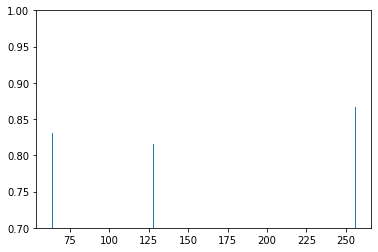

In [108]:
plt.bar(experiment_stats_all['num_filters'], experiment_stats_all['mean_accuracy_test'])
plt.ylim((0.7, 1))

### Window size

<ErrorbarContainer object of 3 artists>

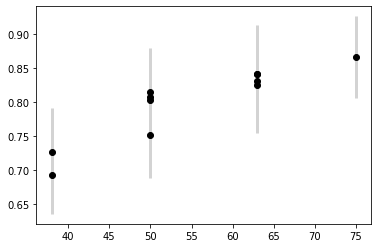

In [109]:
plt.errorbar(x=experiment_stats_all['n_time_steps'], y=experiment_stats_all['mean_accuracy_test'], 
             yerr=experiment_stats_all['std_accuracy_test'], fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0)

Larger seems better

### Larger batch size?

<ErrorbarContainer object of 3 artists>

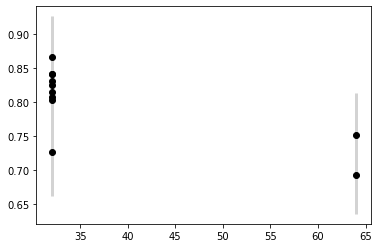

In [110]:
plt.errorbar(x=experiment_stats_all['batch_size'], y=experiment_stats_all['mean_accuracy_test'], 
             yerr=experiment_stats_all['std_accuracy_test'], fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0)

Looks like nope

### More filters?

<ErrorbarContainer object of 3 artists>

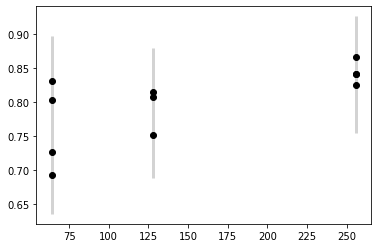

In [111]:
plt.errorbar(x=experiment_stats_all['num_filters'], y=experiment_stats_all['mean_accuracy_test'], 
             yerr=experiment_stats_all['std_accuracy_test'], fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0)

Maybe. We can try batch size of 32 and 128 filters, then batch_size 32 and 256 filters with a large window size

In [112]:
mask = (experiment_stats_all['batch_size'] == 32) & (experiment_stats_all['num_filters'] == 128)
experiment_stats_all[mask]

,experiment_name,activity_name,correctness,random_seed,n_train_subjects,n_validation_subjects,n_time_steps,step,n_features,features,...,mean_accuracy_valid,mean_loss_valid,std_accuracy_valid,std_loss_valid,mean_accuracy_test,mean_f1_test,mean_loss_test,std_accuracy_test,std_f1_test,std_loss_test
9,01all_window_size_50_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.810263,0.609122,0.04296,0.101629,0.815302,0.964934,0.597862,0.064730,0.062228,0.195575
12,01all_batch_size_32_deep_architecture,all,all,42,12,2,50,25,3,normalised,...,0.807775,0.585695,0.03337,0.106134,0.808469,0.977302,0.574231,0.054774,0.039308,0.164895


## Plot two variables at a time and see what effect they have

In [113]:
experiment_stats_all.columns

Index(['experiment_name', 'activity_name', 'correctness', 'random_seed',
       'n_train_subjects', 'n_validation_subjects', 'n_time_steps', 'step',
       'n_features', 'features', 'num_filters', 'kernel_size', 'activation',
       'lr', 'batch_size', 'epochs', 'downsample_rate',
       'positive_class_weight', 'mean_accuracy_train', 'mean_loss_train',
       'std_accuracy_train', 'std_loss_train', 'mean_accuracy_valid',
       'mean_loss_valid', 'std_accuracy_valid', 'std_loss_valid',
       'mean_accuracy_test', 'mean_f1_test', 'mean_loss_test',
       'std_accuracy_test', 'std_f1_test', 'std_loss_test'],
      dtype='object')

In [114]:
variables = ['n_time_steps', 'step', 'num_filters', 'kernel_size', 'batch_size', 'epochs']

In [115]:
measures = ['mean_accuracy_test', 'mean_f1_test']

In [116]:
for var in variables:
    print("Variable = {}\nValues: {}".format(var, set(experiment_stats_all[var].values)))

Variable = n_time_steps
Values: {50, 75, 38, 63}
Variable = step
Values: {25, 19}
Variable = num_filters
Values: {64, 256, 128}
Variable = kernel_size
Values: {3}
Variable = batch_size
Values: {32, 64}
Variable = epochs
Values: {400, 250, 500}


Text(0.5, 0, 'mean_f1_test')

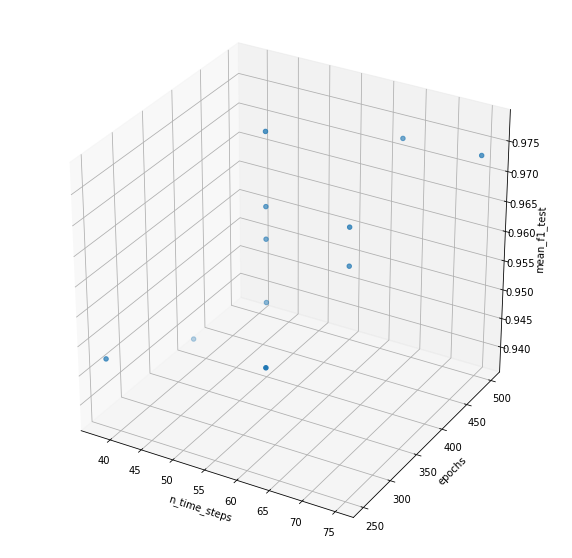

In [117]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(experiment_stats_all['n_time_steps'], experiment_stats_all['epochs'], experiment_stats_all['mean_f1_test'])

ax.set_xlabel('n_time_steps')
ax.set_ylabel('epochs')
ax.set_zlabel('mean_f1_test')

A bit unintelligible and I don't think this would show too well in a report. Let's try plotting 2x2 scatter plots

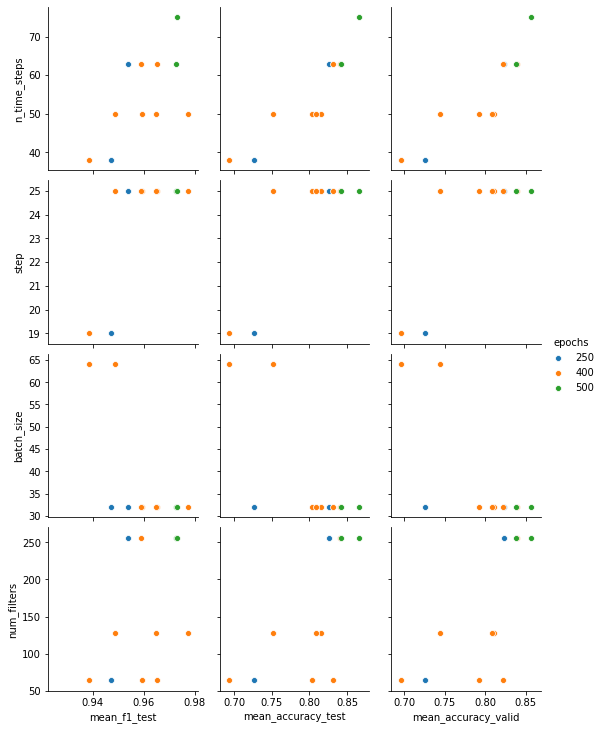

In [118]:
sns.pairplot(experiment_stats_all, x_vars=["mean_f1_test", "mean_accuracy_test", "mean_accuracy_valid"],
             y_vars = ["n_time_steps", "step", "batch_size", "num_filters"], hue="epochs")

In [46]:
experiment_stats_all.loc[12]['experiment_name']

'01all_batch_size_32_deep_architecture'

In [52]:
experiment_stats_all['architecture'] = 'shallow'

/home/teo/miniconda3/envs/minf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
experiment_stats_all.loc[12, 'architecture'] = 'deep'

/home/teo/miniconda3/envs/minf/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [54]:
experiment_stats_all

,experiment_name,activity_name,correctness,random_seed,n_train_subjects,n_validation_subjects,n_time_steps,step,n_features,features,...,mean_loss_valid,std_accuracy_valid,std_loss_valid,mean_accuracy_test,mean_f1_test,mean_loss_test,std_accuracy_test,std_f1_test,std_loss_test,architecture
5,00all_64_filters,all,all,42,12,2,38,19,3,normalised,...,0.860731,0.041283,0.094856,0.726605,0.947329,0.857724,0.064673,0.063130,0.156454,shallow
6,01all_batch_size_64,all,all,42,12,2,38,19,3,normalised,...,0.947230,0.037829,0.084849,0.693636,0.938413,0.942897,0.057487,0.076626,0.136513,shallow
7,00all_window_size_50_400_epochs,all,all,42,12,2,50,25,3,normalised,...,0.654151,0.041164,0.095628,0.803456,0.959464,0.644103,0.066215,0.069602,0.183745,shallow
8,00all_window_size_62_5_400_epochs,all,all,42,12,2,63,25,3,normalised,...,0.569039,0.045877,0.118178,0.830910,0.965301,0.552498,0.066211,0.062277,0.193410,shallow
9,01all_window_size_50_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.609122,0.042960,0.101629,0.815302,0.964934,0.597862,0.064730,0.062228,0.195575,shallow
10,01all_batch_size_64_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.812071,0.042731,0.086743,0.751369,0.948624,0.813841,0.062374,0.081699,0.167157,shallow
11,00all_window_size_63_num_filters_256_400_epochs,all,all,42,12,2,63,25,3,normalised,...,0.588268,0.041921,0.105558,0.825649,0.953979,0.589415,0.070545,0.097607,0.223827,shallow
12,01all_batch_size_32_deep_architecture,all,all,42,12,2,50,25,3,normalised,...,0.585695,0.033370,0.106134,0.808469,0.977302,0.574231,0.054774,0.039308,0.164895,deep
13,00all_window_size_63_num_filters_256_400_epoch...,all,all,42,12,2,63,25,3,normalised,...,0.506908,0.039002,0.108277,0.841339,0.958803,0.513598,0.072381,0.073296,0.227374,shallow


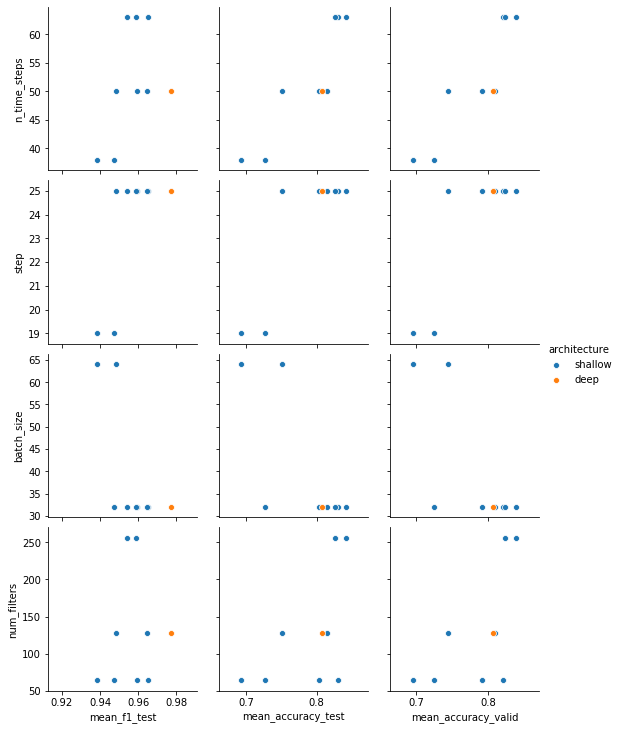

In [55]:
sns.pairplot(experiment_stats_all, x_vars=["mean_f1_test", "mean_accuracy_test", "mean_accuracy_valid"],
             y_vars = ["n_time_steps", "step", "batch_size", "num_filters"], hue="architecture")

In [60]:
data = pd.read_csv("../Data/adela/correct/adela_Sit to stand_Correct_20191112T203755.csv", header=7)

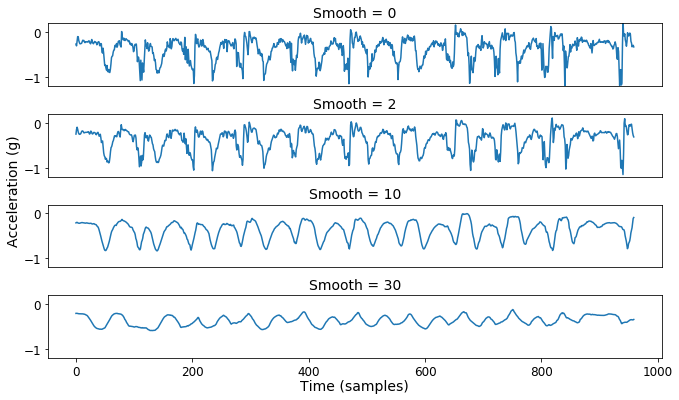

In [99]:
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1,1,1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Set common labels
ax.set_xlabel("Time (samples)", fontsize=14)
ax.set_ylabel("Acceleration (g)", fontsize=14)

ax0 = fig.add_subplot(4,1,1)
ax0.plot(data['accel_x'])
ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax0.tick_params(axis='y', labelsize=12)
ax0.set_title("Smooth = 0", fontsize=14)
ax0.set_ylim((-1.2,0.2))

smooth_low = smooth(2, data['accel_x'].values)
smooth_inter = smooth(10, data['accel_x'].values)
smooth_high = smooth(30, data['accel_x'].values)
ax1 = fig.add_subplot(4,1,2)
ax1.plot(smooth_low[:len(smooth_low)-4], label="smooth=2")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_title("Smooth = 2", fontsize=14)
ax1.set_ylim((-1.2,0.2))

ax2 = fig.add_subplot(4,1,3)
ax2.plot(smooth_inter[:len(smooth_inter)-20], label="smooth=10")
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_title("Smooth = 10", fontsize=14)
ax2.set_ylim((-1.2,0.2))

ax3 = fig.add_subplot(4,1,4)
ax3.plot(smooth_high[:len(smooth_high)-30], label="smooth=30")
ax3.set_title("Smooth = 30", fontsize=14)
ax3.set_ylim((-1.2,0.2))
ax3.tick_params(axis='y', labelsize=12)
ax3.tick_params(axis='x', labelsize=12)

fig.tight_layout()
plt.savefig("./smoothing_windows.pdf")